In [1]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [17]:
def saturation(val):
  if val > 255:
    return 255
  elif val < 0:
    return 0
  else:
    return val

(256, 256, 3)


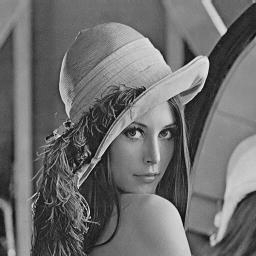

In [4]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/lena256.jpg')
print(img.shape)
gImg1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#plt.imshow(gImg1, cmap='gray')
cv2_imshow(gImg1)

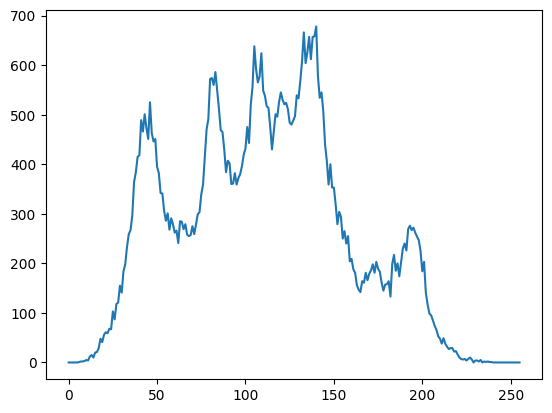

In [6]:
hist = cv2.calcHist([gImg1], [0], None, [256], [0,255])
plt.plot(hist)

(256, 256, 3)


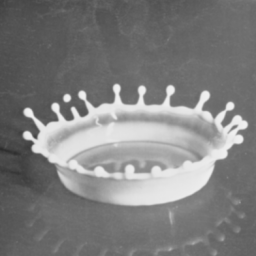

In [36]:
#img = cv2.imread('/content/gdrive/My Drive/IP/Images/lena256.jpg')
#img = cv2.imread('/content/gdrive/My Drive/IP/Images/rice.bmp')
#img = cv2.imread('/content/gdrive/My Drive/IP/Images/cell.bmp')
#img = cv2.imread('/content/gdrive/My Drive/IP/Images/cell-bright.bmp')
img = cv2.imread('/content/gdrive/My Drive/IP/Images/milkdrop.bmp')
print(img.shape)
gImg1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cv2_imshow(gImg1)

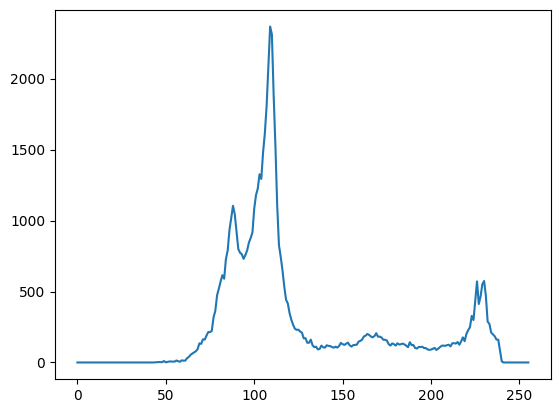

In [44]:
hist = cv2.calcHist([gImg1], [0], None, [256], [0,255])
plt.plot(hist)

In [37]:
gBin = np.zeros((gImg1.shape[0], gImg1.shape[1]), dtype  = np.ubyte)

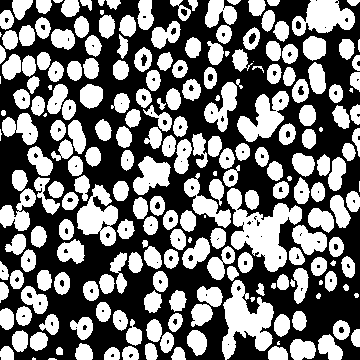

In [32]:
Threshold = 180
for h in range(gImg1.shape[0]):
  for w in range(gImg1.shape[1]):
    if gImg1[h,w] > Threshold :
      gBin[h,w] = 0
    else :
      gBin[h,w] = 255

cv2_imshow(gBin)

In [38]:
T1 = 128
T2 = 0
T0 = 1

In [39]:
def threshold_update(img, bImg) :
  sum1 = 0
  count1 = 1
  sum2 = 0
  count2 = 1

  for h in range(img.shape[0]):
    for w in range(img.shape[1]):
      if bImg[h,w] == 0:
        sum1 += np.int32(img[h,w])
        count1 += 1
      else :
        sum2 += np.int32(img[h,w])
        count2 += 1

  avg1 = sum1/count1
  avg2 = sum2/count2
  T = (avg1 + avg2)/2
  return T

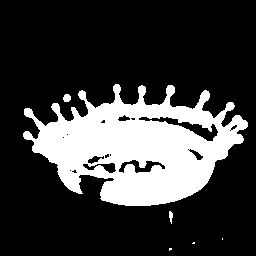

In [42]:
for h in range(gImg1.shape[0]):
  for w in range(gImg1.shape[1]):
    if gImg1[h,w] > T1 :
      gBin[h,w] = 255
    else :
      gBin[h,w] = 0

cv2_imshow(gBin)

152.31531341951757


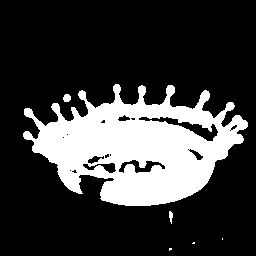

In [43]:
while True :
  T2 = threshold_update(gImg1, gBin)

  if np.abs(T1-T2) < T0 :
    break
  else :
    T1 = T2
    for h in range(gImg1.shape[0]):
      for w in range(gImg1.shape[1]):
        if gImg1[h,w] > T1 :
          gBin[h,w] = 255
        else :
          gBin[h,w] = 0

print(T1)
cv2_imshow(gBin)